![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Zomato_Logo.svg/330px-Zomato_Logo.svg.png)


Zomato (/zoʊmɑːtoʊ/) is an Indian multinational restaurant aggregator and food delivery company founded by **Deepinder Goyal** and **Pankaj Chaddah** in **2008**. Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities. As of 2019, the service is available in 24 countries and in more than 10,000 cities


In this tutorial we are gonna be looking at the data of Bengaluru city which is in India and try to make some sense of the data as we go along and explore the dataset.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15, 10)

#supress warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('../input/zomato-bangalore-restaurants-2022/BangaloreZomatoData.csv')
df.head()

,Name,URL,Cuisines,Area,Timing,Full_Address,PhoneNumber,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
0,Sri Udupi Park,https://www.zomato.com/bangalore/sri-udupi-par...,"South Indian, North Indian, Chinese, Street Fo...","Indiranagar, Bangalore",7am – 11pm (Today),"273, Monalisa, 6th Main, 100 Feet Road, Indira...",+919945977774,1,1,1,1,4.0,462,4.1,16000,NaN,"Filtered Coffee, Sambhar, Pav Bhaji, Gobi Manc...","Economical, Prompt Service, Hygiene, Quality F...",450
1,Meghana Foods,https://www.zomato.com/bangalore/meghana-foods...,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",Opens at 6:30pm,"544, First Floor, CMH Road, Near Indiranagar M...",+918041135050,1,1,1,0,4.3,1654,4.3,28600,Spicy Chicken Biryani,"Authentic Hyderabadi Biryani, Paneer Biryani, ...","Boneless Chicken Biryani, Ample Seating Area, ...",700
2,Donne Biriyani House,https://www.zomato.com/bangalore/donne-biriyan...,Biryani,"Indiranagar, Bangalore",11am – 11pm (Today),"8/ 9, 17th F Cross, 2nd Stage, Indiranagar, Ba...",+918861564169,1,1,1,0,3.9,411,3.5,33200,NaN,NaN,"Great Recommendations, Nice Taste, Great Ambia...",300
3,Domino's Pizza,https://www.zomato.com/bangalore/dominos-pizza...,"Pizza, Fast Food, Desserts","Indiranagar, Bangalore",10:57am – 12midnight (Today),"308, 2nd Stage, 100 Feet Road, Indiranagar, Ba...",+919916465787,1,1,1,0,2.4,422,4.4,8205,NaN,"Barbeque Chicken Pizza, Choco Lava Cake, White...","Value for Money, Packaging, Staff, Ambience, Food",400
4,KFC,https://www.zomato.com/bangalore/kfc-indiranagar,"Burger, Fast Food, Biryani, Desserts, Beverages","Indiranagar, Bangalore",11am – 11pm (Today),"38/1A, CMH Road, Indiranagar, Bangalore",+919513700040,1,1,1,0,2.8,673,4.0,9148,NaN,"Fiery Chicken, Chicken Popcorn, Rice Bowl, Wings","Elegantly Decorated, Great Recommendations, Vi...",400


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8923 entries, 0 to 8922
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              8923 non-null   object
 1   URL               8923 non-null   object
 2   Cuisines          8923 non-null   object
 3   Area              8923 non-null   object
 4   Timing            5820 non-null   object
 5   Full_Address      8923 non-null   object
 6   PhoneNumber       8923 non-null   object
 7   IsHomeDelivery    8923 non-null   int64 
 8   isTakeaway        8923 non-null   int64 
 9   isIndoorSeating   8923 non-null   int64 
 10  isVegOnly         8923 non-null   int64 
 11  Dinner Ratings    8923 non-null   object
 12  Dinner Reviews    8923 non-null   int64 
 13  Delivery Ratings  8923 non-null   object
 14  Delivery Reviews  8923 non-null   int64 
 15  KnownFor          258 non-null    object
 16  PopularDishes     1535 non-null   object
 17  PeopleKnownFor

There are some Null values in the last few columns. There are some columns that we can drop since they won't be much helpful.

In [4]:
df.describe()

,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Reviews,Delivery Reviews,AverageCost
count,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000
mean,0.997871,0.660092,0.442676,0.072285,157.106018,2014.709403,340.225261
std,0.046098,0.473704,0.496731,0.258974,731.834227,5524.430542,308.338943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,42.000000,150.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,279.000000,250.000000
75%,1.000000,1.000000,1.000000,0.000000,43.000000,1493.500000,400.000000
max,1.000000,1.000000,1.000000,1.000000,26500.000000,99600.000000,4200.000000


The average cost goes from 50 bucks and goes all the way upto 4200 and the average of average cost is 340 bucks. 

The reviews are none in some of the cases however the maximum number of reviews is 99,600 for delivery reviews however for dinner (dine-in) reviews there are 26,500 reviews and purely looking at numbers we can either concur that:-
* people are getting food delivered more than they dine-in or 
* the people who dine-in don't leave as much reviews.

In [5]:
np.around(df.corr()[df.corr()>0.0],3)

,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Reviews,Delivery Reviews,AverageCost
IsHomeDelivery,1.000,0.064,0.041,0.013,0.010,0.016,NaN
isTakeaway,0.064,1.000,0.582,0.128,0.126,0.137,0.257
isIndoorSeating,0.041,0.582,1.000,0.109,0.228,0.167,0.516
isVegOnly,0.013,0.128,0.109,1.000,0.007,0.049,NaN
Dinner Reviews,0.010,0.126,0.228,0.007,1.000,0.201,0.470
Delivery Reviews,0.016,0.137,0.167,0.049,0.201,1.000,0.074
AverageCost,NaN,0.257,0.516,NaN,0.470,0.074,1.000


1. From the correlation matrix above, we see that Avge Cost and Indoor seating has a positive correlation which makes sense.
2. Similarly, it also makes sense that if the restaurant offers Take Away, the avge cost will be less. 
3. The avge cost and the dinner reviews also has a positive correlation which means reviews are also affecting the average cost. 

                        Correlation among various features is visible in the heatmap above.

In [6]:
corr = df.corr()
corr = np.around(corr[corr > 0.0],3)
fig = px.imshow(corr, 
                text_auto=True, template='simple_white',
                color_continuous_scale=px.colors.sequential.Viridis, 
                aspect="auto")
fig.update_xaxes(side="top")
fig.show()

In [7]:
df.drop(['URL', 'Full_Address','PhoneNumber'], axis= 1, inplace=True)
df

,Name,Cuisines,Area,Timing,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
0,Sri Udupi Park,"South Indian, North Indian, Chinese, Street Fo...","Indiranagar, Bangalore",7am – 11pm (Today),1,1,1,1,4.0,462,4.1,16000,NaN,"Filtered Coffee, Sambhar, Pav Bhaji, Gobi Manc...","Economical, Prompt Service, Hygiene, Quality F...",450
1,Meghana Foods,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",Opens at 6:30pm,1,1,1,0,4.3,1654,4.3,28600,Spicy Chicken Biryani,"Authentic Hyderabadi Biryani, Paneer Biryani, ...","Boneless Chicken Biryani, Ample Seating Area, ...",700
2,Donne Biriyani House,Biryani,"Indiranagar, Bangalore",11am – 11pm (Today),1,1,1,0,3.9,411,3.5,33200,NaN,NaN,"Great Recommendations, Nice Taste, Great Ambia...",300
3,Domino's Pizza,"Pizza, Fast Food, Desserts","Indiranagar, Bangalore",10:57am – 12midnight (Today),1,1,1,0,2.4,422,4.4,8205,NaN,"Barbeque Chicken Pizza, Choco Lava Cake, White...","Value for Money, Packaging, Staff, Ambience, Food",400
4,KFC,"Burger, Fast Food, Biryani, Desserts, Beverages","Indiranagar, Bangalore",11am – 11pm (Today),1,1,1,0,2.8,673,4.0,9148,NaN,"Fiery Chicken, Chicken Popcorn, Rice Bowl, Wings","Elegantly Decorated, Great Recommendations, Vi...",400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8918,New SBFC Food Funda,Fast Food,"Frazer Town, Bangalore",4:30pm – 11:45pm (Today),1,1,1,0,3.7,14,4.0,48,NaN,NaN,"Cheap and Affordable, Served Quickly, Fresh Fo...",300
8919,Kudla - Coraltree,"Seafood, Mangalorean, Beverages","Coraltree, RT Nagar, Bangalore",12noon – 10pm (Today),1,1,0,0,3.9,348,4.3,564,NaN,"Neer Dosa, Chicken Ghee Roast, Seafood, Crab, ...","Authentic, Cashless Payments, Preparation, Dec...",1200
8920,Bangkok Bowl,"Salad, Chinese","Kammanahalli, Bangalore","12noon – 3pm, 6:30pm – 10pm (Today)",1,1,0,0,-,0,3.7,254,NaN,NaN,"Contactless Delivery, Portion, Great Portions,...",300
8921,Yuan Restaurant,"Thai, Chinese","HBR Layout, Bangalore",Opens at 7pm,1,1,1,0,3.8,188,3.5,3169,NaN,NaN,"Calm, Prompt Service, Portions, Spicy, Delicio...",400


In the above column we are removing those columns that may not be so useful for our analysis

In [8]:
for i in df.select_dtypes(include=['int64']):
    fig= px.histogram(df.select_dtypes(include=['int64'])[i], 
             x=i, 
             template='simple_white')
    fig.show();

*Analysis from the above charts*:-
1. More restaurants in Bangalore are doing the home delivery than the takeaways. Restaurants are focussing more on delivering the convenience to the customers as opposed to having the people walk up to the restaurants to pick up their order.
2. Veg Only restaurants are very less in Bengaluru, India,
3. Dine-in places are less which relates with our first point that states there are more restaurants that like to deliver.
4. Dinner Reviews are less than Delivery reviews. The dinner reviews are bound to be less just by the comparison of the deliveries being done in the area.
5. Average Cost is within the Rs 300-400 range.

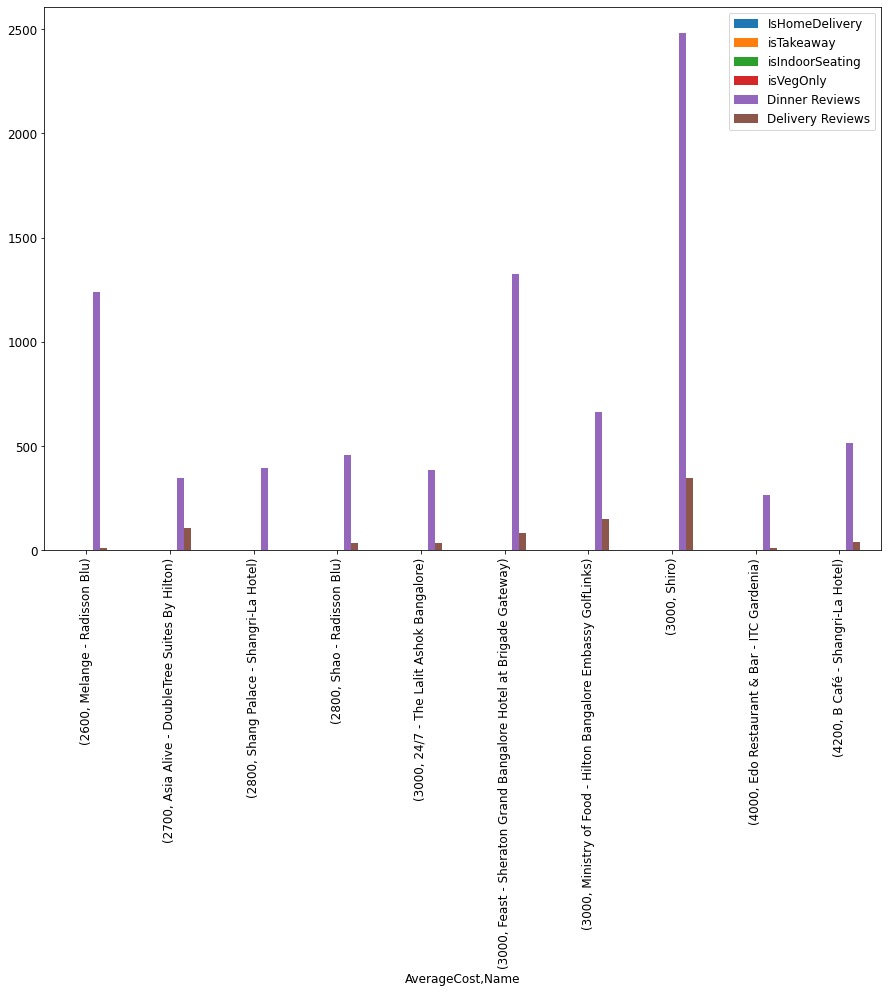

In [9]:
df1 = df.copy().sort_values(by='AverageCost',ascending= False).drop_duplicates('Name').head(10)
df1.groupby(['AverageCost','Name']).mean().plot.bar();

In [10]:
df1.groupby(['AverageCost', 'Name']).sum()

IsHomeDelivery  \
AverageCost Name                                                                 
2600        Melange - Radisson Blu                                           1   
2700        Asia Alive - DoubleTree Suites By Hilton                         1   
2800        Shang Palace - Shangri-La Hotel                                  1   
            Shao - Radisson Blu                                              1   
3000        24/7 - The Lalit Ashok Bangalore                                 1   
            Feast - Sheraton Grand Bangalore Hotel at Briga...               1   
            Ministry of Food - Hilton Bangalore Embassy Gol...               1   
            Shiro                                                            1   
4000        Edo Restaurant & Bar - ITC Gardenia                              1   
4200        B Café - Shangri-La Hotel                                        1   

                                                                isTakeaway  \
AverageCost Name                                                             
2600        Melange - Radisson Blu                                       0   
2700        Asia Alive - DoubleTree Suites By Hilton                     0   
2800        Shang Palace - Shangri-La Hotel                              0   
            Shao - Radisson Blu                                          1   
3000        24/7 - The Lalit Ashok Bangalore                             0   
            Feast - Sheraton Grand Bangalore Hotel at Briga...           1   
            Ministry of Food - Hilton Bangalore Embassy Gol...           1   
            Shiro                                                        0   
4000        Edo Restaurant & Bar - ITC Gardenia                          0   
4200        B Café - Shangri-La Hotel                                    0   

                                                                isIndoorSeating  \
AverageCost Name                                                                  
2600        Melange - Radisson Blu                                            1   
2700        Asia Alive - DoubleTree Suites By Hilton                          1   
2800        Shang Palace - Shangri-La Hotel                                   1   
            Shao - Radisson Blu                                               1   
3000        24/7 - The Lalit Ashok Bangalore                                  1   
            Feast - Sheraton Grand Bangalore Hotel at Briga...                1   
            Ministry of Food - Hilton Bangalore Embassy Gol...                1   
            Shiro                                                             1   
4000        Edo Restaurant & Bar - ITC Gardenia                               1   
4200        B Café - Shangri-La Hotel                                         1   

                                                                isVegOnly  \
AverageCost Name                                                            
2600        Melange - Radisson Blu                                      0   
2700        Asia Alive - DoubleTree Suites By Hilton                    0   
2800        Shang Palace - Shangri-La Hotel                             0   
            Shao - Radisson Blu                                         0   
3000        24/7 - The Lalit Ashok Bangalore                            0   
            Feast - Sheraton Grand Bangalore Hotel at Briga...          0   
            Ministry of Food - Hilton Bangalore Embassy Gol...          0   
            Shiro                                                       0   
4000        Edo Restaurant & Bar - ITC Gardenia                         0   
4200        B Café - Shangri-La Hotel                                   0   

                                                                Dinner Reviews  \
AverageCost Name                                                                 
2600        Melange - Radisson Blu                      

In [11]:
#Restaurant wise average cost in Bengaluru Location
fig = px.bar(df1, x='Name', template='simple_white',y='AverageCost', color= 'Name', text_auto=True)
fig.update_xaxes(categoryorder='total descending')
fig.show()

The restaurants having the highest average cost are 
* B-Cafe, 
* Edo Restaurant & Bar, 
* Shiro
* 24/7 - The Lalit Ashok Bangalore
* Feast - Sheraton Grand Bangalore Hotel at Brigade Gateway

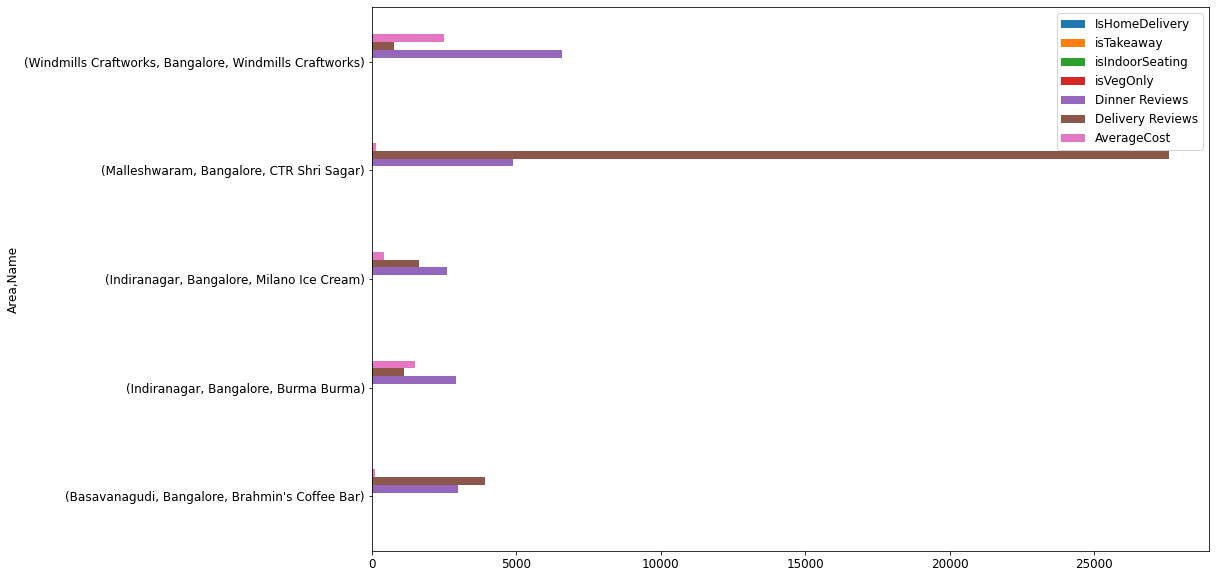

In [12]:
df2 = df.copy().sort_values(by='Dinner Ratings',ascending= False).drop_duplicates('Name').head(5)
df2.groupby(['Area','Name']).sum().plot.barh();

The restaurants with the highest dine-in ratings are 
* Brahmin's Coffee Bar
* Windmills Craftworks
* Milano Ice Cream
* Burma Burma

In [13]:
for i in df2[['Name', 'Cuisines', 'Area', 'Timing', 'Dinner Reviews',
       'Delivery Ratings', 'AverageCost']]:
    fig = px.histogram(df2[['Name', 'Cuisines', 'Area', 'Timing', 'Dinner Reviews',
       'Delivery Ratings', 'PopularDishes', 'AverageCost']], x=i, template='simple_white', text_auto=True)
    fig.update_xaxes(categoryorder='total descending')
    fig.show()

In [14]:
# Converting Ratings to float from object datatype
df['Dinner Ratings'] = df['Dinner Ratings'].str.replace('-', '0').astype(np.float64)
df['Delivery Ratings'] = df['Delivery Ratings'].str.replace('-', '0').astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8923 entries, 0 to 8922
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              8923 non-null   object 
 1   Cuisines          8923 non-null   object 
 2   Area              8923 non-null   object 
 3   Timing            5820 non-null   object 
 4   IsHomeDelivery    8923 non-null   int64  
 5   isTakeaway        8923 non-null   int64  
 6   isIndoorSeating   8923 non-null   int64  
 7   isVegOnly         8923 non-null   int64  
 8   Dinner Ratings    8923 non-null   float64
 9   Dinner Reviews    8923 non-null   int64  
 10  Delivery Ratings  8923 non-null   float64
 11  Delivery Reviews  8923 non-null   int64  
 12  KnownFor          258 non-null    object 
 13  PopularDishes     1535 non-null   object 
 14  PeopleKnownFor    3484 non-null   object 
 15  AverageCost       8923 non-null   int64  
dtypes: float64(2), int64(7), object(7)
memory 

In [15]:
#Which restaurant is famous in different localities in Kolkata?
df.groupby(['Area','Name']).sum().head(15)

IsHomeDelivery  \
Area                                               Name                                    
1 MG Road Mall, MG Road, Bangalore                 Bakery By Foodhall                  1   
                                                   Fruitify                            1   
                                                   ROYCE' Chocolate                    1   
                                                   Smoor                               1   
                                                   Yauatcha                            1   
153 Biere Street, Bangalore                        SLV Corner Restaurant               1   
5th Avenue, Brigade Road, Bangalore                Thai House                          1   
Abhimaani Vasathi, Bangalore                       Coastal Spice                       1   
Aloft Bengaluru Cessna Business Park, Kadubeesa... Nandhini Deluxe                     1   
Aloft Hotel, Whitefield, Bangalore                 Dot.yum - Aloft Hotel               1   
                                                   Estia - Aloft Hotel                 1   
Ascendas Park Square, Whitefield, Bangalore        Amoeba Sports Bar                   1   
                                                   Barbeque Nation                     1   
                                                   California Burrito                  1   
                                                   Deccan Paradise                     1   

                                                                          isTakeaway  \
Area                                               Name                                
1 MG Road Mall, MG Road, Bangalore                 Bakery By Foodhall              1   
                                                   Fruitify                        1   
                                                   ROYCE' Chocolate                1   
                                                   Smoor                           1   
                                                   Yauatcha                        1   
153 Biere Street, Bangalore                        SLV Corner Restaurant           1   
5th Avenue, Brigade Road, Bangalore                Thai House                      1   
Abhimaani Vasathi, Bangalore                       Coastal Spice                   1   
Aloft Bengaluru Cessna Business Park, Kadubeesa... Nandhini Deluxe                 1   
Aloft Hotel, Whitefield, Bangalore                 Dot.yum - Aloft Hotel           1   
                                                   Estia - Aloft Hotel             0   
Ascendas Park Square, Whitefield, Bangalore        Amoeba Sports Bar               1   
                                                   Barbeque Nation                 1   
                                                   California Burrito              1   
                                                   Deccan Paradise                 1   

                                                                          isIndoorSeating  \
Area                                               Name                                     
1 MG Road Mall, MG Road, Bangalore                 Bakery By Foodhall                   0   
                                                   Fruitify                             1   
                                                   ROYCE' Chocolate                     0   
                                                   Smoor                                0   
                                                   Yauatcha                             1   
153 Biere Street, Bangalore                        SLV Corner Restaurant                1   
5th Avenue, Brigade Road, Bangalore                Thai House                           1   
Abhimaani Vasathi, Bangalore                       Coastal Spice                        1   
Aloft Bengaluru Cessna Business Park, Kadubeesa... Nandhini Deluxe                

In [16]:
for i in df[['Dinner Ratings','Delivery Ratings', 'AverageCost']]:
    fig = px.histogram(df[['Dinner Ratings','Delivery Ratings', 'AverageCost']], 
                       x=i, 
                       template='simple_white')
    fig.update_xaxes(categoryorder='total descending')
    fig.show()

**Note** :- 

In case of zero rating, it could either be the customer not giving any rating or he may have actually given the zero rating.

In [17]:
#Which cuisines are the most famous in different localities?
df.groupby(['Area','Cuisines']).sum()

IsHomeDelivery  \
Area                               Cuisines                                                             
1 MG Road Mall, MG Road, Bangalore Bakery, Desserts                                                 1   
                                   Bakery, Desserts, Panini, Mexican, American                      1   
                                   Chinese, Asian, Seafood                                          1   
                                   Desserts                                                         1   
                                   Sandwich, Fast Food, Ice Cream, Desserts, Bever...               1   
...                                                                                               ...   
Yeshwantpur, Bangalore             South Indian, North Indian, Kebab, Biryani                       1   
                                   South Indian, Street Food, Chinese                               1   
                                   South Indian, Tea                                                1   
                                   Street Food                                                      3   
                                   Street Food, Arabian, North Indian, Mughlai, Se...               1   

                                                                                       isTakeaway  \
Area                               Cuisines                                                         
1 MG Road Mall, MG Road, Bangalore Bakery, Desserts                                             1   
                                   Bakery, Desserts, Panini, Mexican, American                  1   
                                   Chinese, Asian, Seafood                                      1   
                                   Desserts                                                     1   
                                   Sandwich, Fast Food, Ice Cream, Desserts, Bever...           1   
...                                                                                           ...   
Yeshwantpur, Bangalore             South Indian, North Indian, Kebab, Biryani                   1   
                                   South Indian, Street Food, Chinese                           1   
                                   South Indian, Tea                                            1   
                                   Street Food                                                  2   
                                   Street Food, Arabian, North Indian, Mughlai, Se...           1   

                                                                                       isIndoorSeating  \
Area                               Cuisines                                                              
1 MG Road Mall, MG Road, Bangalore Bakery, Desserts                                                  0   
                                   Bakery, Desserts, Panini, Mexican, American                       0   
                                   Chinese, Asian, Seafood                                           1   
                                   Desserts                                                          0   
                                   Sandwich, Fast Food, Ice Cream, Desserts, Bever...                1   
...                                                                                                ...   
Yeshwantpur, Bangalore             South Indian, North Indian, Kebab, Biryani                        1   
                                   South Indian, Street Food, Chinese                                1   
                                   South Indian, Tea                                                 0   
                                   Street Food                                                       0   
                                   Street Food, Arabian, North Indian, Mughlai, Se...                0   

                            

In [18]:
#What is the highest rating restaurant for any particular cuisines?
fig = px.bar(df.groupby(['Cuisines']).sum().head(10), 
             x='Delivery Ratings', 
             template='simple_white', 
             title ='Ratings Of Various Cuisines')
fig.update_yaxes(categoryorder='total ascending')
fig.show();

In [19]:
#What is the highest rating restaurant for any particular cuisines?
df.groupby(['Cuisines']).mean().sort_values(by='Delivery Ratings', ascending=False)

,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,AverageCost
Cuisines,,,,,,,,,
"Beverages, Bubble Tea",1.0,0.0,0.0,0.0,0.0,0.0,4.6,195.0,250.0
"Bakery, Fast Food, Desserts, Beverages",1.0,1.0,0.0,0.0,0.0,0.0,4.6,674.0,350.0
"Street Food, Fast Food, Beverages, Coffee",1.0,1.0,1.0,0.0,4.4,370.0,4.6,244.0,400.0
Maharashtrian,1.0,1.0,1.0,1.0,4.2,195.0,4.5,834.0,250.0
Korean,1.0,1.0,1.0,0.0,4.1,251.0,4.5,578.0,800.0
...,...,...,...,...,...,...,...,...,...
"Bengali, Street Food",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
"Continental, Asian, Bar Food, Desserts, Beverages",1.0,1.0,1.0,0.0,4.2,1042.0,0.0,7.0,1700.0
"Mughlai, North Indian, Chinese, Biryani",1.0,1.0,1.0,0.0,3.0,19.0,0.0,0.0,1200.0


In [20]:
#What is the best restaurant for each category (Dine-In, Delivery, Takeaway, Vegetarian)
df[df.isIndoorSeating.eq(1)].sort_values(by='Dinner Ratings', ascending=False).head(1)

,Name,Cuisines,Area,Timing,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
231,Milano Ice Cream,"Desserts, Ice Cream, Beverages, Shake","Indiranagar, Bangalore",9:30am – 10pm (Today),1,1,1,0,4.9,2582,4.3,1642,Varieties of Gelato Ice Creams.,"Baileys Ice Cream, Extra Dark Chocolate, Vanil...","Bank for the Buck, Totally Worth it, Cozy Ambi...",400


In [21]:
#What is the best restaurant for each category (Delivery)
df[df.IsHomeDelivery.eq(1)].sort_values(by='Delivery Ratings', ascending=False).head(1)

,Name,Cuisines,Area,Timing,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
5924,Apsara Ice Creams,"Ice Cream, Desserts","Kalyan Nagar, Bangalore",NaN,1,0,0,0,0.0,0,4.7,207,NaN,NaN,NaN,100


In [22]:
#What is the best restaurant for each category (Takeaway)
df[df.isTakeaway.eq(1)].sort_values(by='Dinner Ratings', ascending=False).head(1)

,Name,Cuisines,Area,Timing,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
231,Milano Ice Cream,"Desserts, Ice Cream, Beverages, Shake","Indiranagar, Bangalore",9:30am – 10pm (Today),1,1,1,0,4.9,2582,4.3,1642,Varieties of Gelato Ice Creams.,"Baileys Ice Cream, Extra Dark Chocolate, Vanil...","Bank for the Buck, Totally Worth it, Cozy Ambi...",400


In [23]:
#What is the best restaurant for each category (Vegetarian)
df[df.isVegOnly.eq(1)].sort_values(by='Dinner Ratings', ascending=False).head(1)

,Name,Cuisines,Area,Timing,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
3530,Brahmin's Coffee Bar,South Indian,"Basavanagudi, Bangalore","6am – 12noon, 3pm – 7pm (Today)",1,1,0,1,4.9,2976,4.5,3923,NaN,"Idli Chatni, Coffee Bar, Khara Bhath, Vada Com...","Best Idli, Breakfast Joint, Inexpensive, Good ...",100


In [24]:
reviews = df[pd.notnull(df.PeopleKnownFor)].PeopleKnownFor.values.tolist()
print('FIRST THREE REVIEWS')
print('First Review -',reviews[0])
print('Second Review -',reviews[1])
print('Third Review -',reviews[2])

FIRST THREE REVIEWS
First Review - Economical, Prompt Service, Hygiene, Quality Food, Reasonable Price, Quick Service
Second Review - Boneless Chicken Biryani, Ample Seating Area, Serving Size, Family Place, Relaxed Atmosphere, Delivery Person
Third Review - Great Recommendations, Nice Taste, Great Ambiance, Good Quantity, Excellent Food, Nice Food


Further Reading:-

- https://en.wikipedia.org/wiki/Zomato
- https://www.zomato.com/